In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_sythetic, y_synthetic = make_classification(n_samples = 1000,
                                              n_features = 200,
                                              n_informative = 3,
                                              n_redundant= 10,
                                              n_repeated = 0,
                                              n_classes = 2,
                                              n_clusters_per_class = 2,
                                              weights = None,
                                              flip_y = 0.01,
                                              class_sep = 0.8,
                                              hypercube = True,
                                              shift = 0.0,
                                              scale = 1.0,
                                              shuffle = True,
                                              random_state= 24
                                             )

In [3]:
print(x_sythetic.shape, y_synthetic.shape)
print(np.mean(y_synthetic))

(1000, 200) (1000,)
0.501


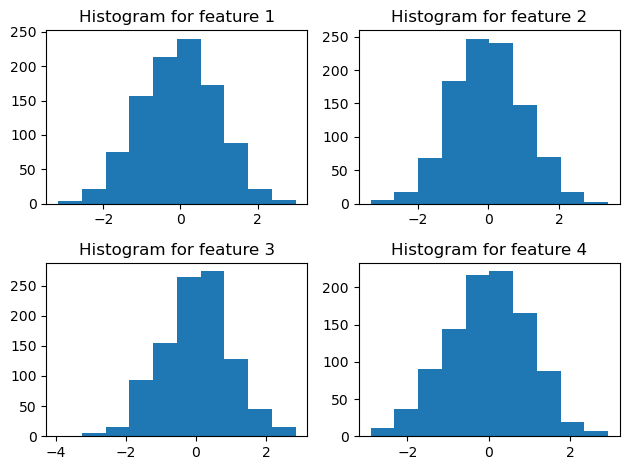

In [4]:
for plot_index in range(4):
    plt.subplot(2,2,plot_index+1)
    plt.hist(x_sythetic[:,plot_index])
    plt.title('Histogram for feature {}'.format(plot_index+1))
    
plt.tight_layout()

In [5]:
x_syn_train, x_syn_test,y_syn_train, y_syn_test = train_test_split(x_sythetic, y_synthetic, test_size = 0.2, random_state = 24)

In [6]:
lr_syn = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1000, random_state= 1)
lr_syn.fit(x_syn_train, y_syn_train)

LogisticRegression(C=1000, penalty='l1', random_state=1, solver='liblinear')

In [7]:
y_syn_train_prob = lr_syn.predict_proba(x_syn_train)
roc_auc_score(y_syn_train, y_syn_train_prob[:,1])

0.9420000000000001

In [8]:
y_syn_test_prob = lr_syn.predict_proba(x_syn_test)
roc_auc_score(y_syn_test, y_syn_test_prob[:,1])

0.8075807580758075

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [10]:
n_folds = 4
k_folds = KFold(n_splits = n_folds, shuffle = False)

In [11]:
k_folds.n_splits


4

In [12]:
#len(C_vals)

NameError: name 'C_vals' is not defined

In [13]:
#for train_index, test_index in k_folds_iterator.split(x_syn_train,y_syn_train):

In [14]:
C_val_exponents = np.linspace(3,-3,13)
C_val_exponents
C_vals = np.float(10)**C_val_exponents
C_vals

C:\Users\sid\AppData\Local\Temp\ipykernel_10080\1548731857.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  C_vals = np.float(10)**C_val_exponents


array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01,
       1.00000000e-01, 3.16227766e-02, 1.00000000e-02, 3.16227766e-03,
       1.00000000e-03])

In [15]:
from sklearn.metrics import roc_curve

In [16]:
def cross_val_C_search(k_folds, C_vals, model, X,Y):
    
    n_folds = k_folds.n_splits
    cv_train_roc_auc = np.empty((n_folds, len(C_vals)))
    cv_test_roc_auc = np.empty((n_folds, len(C_vals)))
    
    cv_test_roc = [[]]*len(C_vals)
    
    for c_val_counter in range(len(C_vals)):
        model.C = C_vals[c_val_counter]
        fold_counter = 0
        
        
        for train_index, test_index in k_folds.split(X,Y):
            X_cv_train, X_cv_test = X[train_index], X[test_index]
            y_cv_train, y_cv_test = Y[train_index], Y[test_index]
        
            model.fit(X_cv_train, y_cv_train)
        
        
            y_cv_train_predict_prob = model.predict_proba(X_cv_train)
            cv_train_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_train, y_cv_train_predict_prob[:,1])
        
        
            y_cv_test_predict_prob  = model.predict_proba(X_cv_test)
            cv_test_roc_auc[fold_counter, c_val_counter] = roc_auc_score(y_cv_test, y_cv_test_predict_prob[:,1])
        
        
        
            this_fold_roc = roc_curve(y_cv_test, y_cv_test_predict_prob[:,1])
            cv_test_roc[c_val_counter].append(this_fold_roc)
        
            fold_counter += 1
        
        print('Done with C = {}'.format(lr_syn.C))
    print(fold_counter)
        
    for this_fold in range(k_folds.n_splits):
        plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o' )
        plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x')
        
    return cv_train_roc_auc, cv_test_roc_auc, cv_test_roc
    #print('cv_train_roc_auc:' ,cv_train_roc_auc)
    print(this_fold_roc)

Done with C = 1000.0
Done with C = 316.22776601683796
Done with C = 100.0
Done with C = 31.622776601683793
Done with C = 10.0
Done with C = 3.1622776601683795
Done with C = 1.0
Done with C = 0.31622776601683794
Done with C = 0.1
Done with C = 0.03162277660168379
Done with C = 0.01
Done with C = 0.0031622776601683794
Done with C = 0.001
4


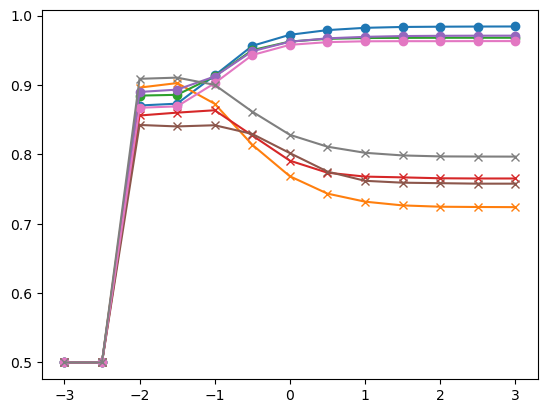

In [17]:
cv_train_roc_auc, cv_test_roc_auc, cv_test_roc = cross_val_C_search(k_folds,C_vals,lr_syn,x_syn_train,y_syn_train )

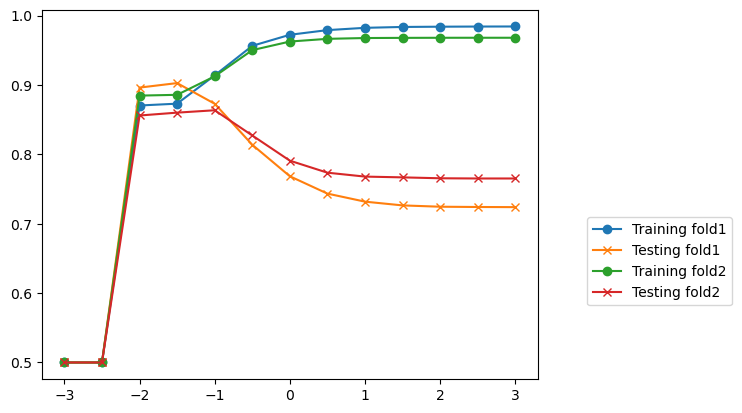

In [18]:
for this_fold in range(k_folds.n_splits-2):
        plt.plot(C_val_exponents, cv_train_roc_auc[this_fold], '-o', label = 'Training fold{}'.format(this_fold+1) )
        plt.plot(C_val_exponents, cv_test_roc_auc[this_fold], '-x', label = 'Testing fold{}'.format(this_fold+1))
        plt.legend(loc = [1.1, 0.2])

In [19]:
cv_test_roc_auc

array([[0.7239    , 0.7241    , 0.7245    , 0.7264    , 0.7318    ,
        0.7434    , 0.7684    , 0.8138    , 0.8729    , 0.9027    ,
        0.8962    , 0.5       , 0.5       ],
       [0.76519726, 0.76519726, 0.76549919, 0.76680757, 0.76791465,
        0.77355072, 0.79086151, 0.82719404, 0.86352657, 0.86010467,
        0.85597826, 0.5       , 0.5       ],
       [0.75772782, 0.75772782, 0.75843035, 0.75913288, 0.76184263,
        0.77519069, 0.80178643, 0.82938579, 0.84193095, 0.84022481,
        0.8423324 , 0.5       , 0.5       ],
       [0.79671869, 0.79681873, 0.79701881, 0.79841937, 0.80222089,
        0.81102441, 0.82813125, 0.86154462, 0.90016006, 0.91056423,
        0.90886355, 0.5       , 0.5       ]])

In [20]:
len(cv_test_roc)

13

In [21]:
for i in range(4):
    print(cv_train_roc_auc[i])

[0.98428889 0.98418889 0.98397778 0.9836     0.98234444 0.97904444
 0.97232222 0.95638889 0.91383333 0.87304444 0.87038889 0.5
 0.5       ]
[0.96803282 0.96803282 0.96799947 0.96787716 0.96763254 0.96647616
 0.96257339 0.9501868  0.91244885 0.88578545 0.88465131 0.5
 0.5       ]
[0.97105509 0.97101063 0.97085501 0.9704882  0.96936552 0.96719799
 0.96231826 0.94857943 0.91217598 0.89327953 0.88991152 0.5
 0.5       ]
[0.9632317  0.96319836 0.96309836 0.96310947 0.96295391 0.96173163
 0.95783146 0.94313081 0.90258456 0.86913863 0.86712743 0.5
 0.5       ]


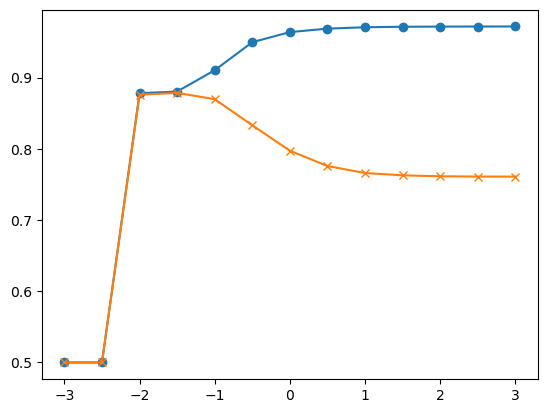

In [25]:
plt.plot(C_val_exponents, np.mean(cv_train_roc_auc, axis = 0), '-o')
plt.plot(C_val_exponents, np.mean(cv_test_roc_auc, axis = 0), '-x')

In [33]:
best_c_val_bool = C_val_exponents == -1.5
best_c_val_bool.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [34]:
best_c_val_index = np.nonzero(best_c_val_bool.astype(int))
best_c_val_index[0][0]

9

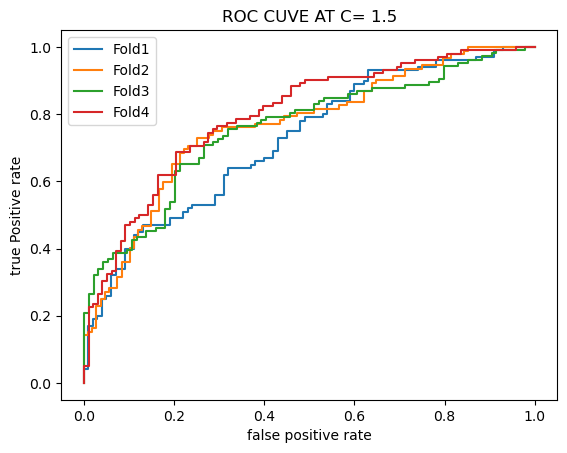

In [42]:
for this_fold in range(k_folds.n_splits):
    fpr = cv_test_roc[best_c_val_index[0][0]][this_fold][0]
    tpr = cv_test_roc[best_c_val_index[0][0]][this_fold][1]
    
    
    plt.plot(fpr,tpr, label = 'Fold{}'.format(this_fold + 1))
    
plt.title("ROC CUVE AT C= 1.5")
plt.ylabel('true Positive rate')
plt.xlabel('false positive rate')
plt.legend()

In [43]:
lr_syn.C = 10**(-1.5)
lr_syn.fit(x_syn_train, y_syn_train)

LogisticRegression(C=0.03162277660168379, penalty='l1', random_state=1,
                   solver='liblinear')

In [44]:
y_syn_train_predict_prob = lr_syn.predict_proba(x_syn_train)

In [46]:
roc_auc_score(y_syn_train, y_syn_train_predict_prob[:,1])

0.8802812499999999

In [47]:
y_syn_test_predict_prob = lr_syn.predict_proba(x_syn_test)

In [50]:
roc_auc_score (y_syn_test,y_syn_test_predict_prob[:,1])

0.8847884788478848

## got the almost similar roc score for train and test data. it happen I optimized the c value 

In [55]:
sum((lr_syn.coef_  != 0)[0])

2

In [56]:
lr_syn.intercept_

array([0.])

### need to transforom the data before penalizing the data when regularizing. so all the features are penalized equally

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
mix_max_sc = MinMaxScaler()

In [59]:
from sklearn.pipeline import Pipeline

In [84]:
scale_lr_pipeline = Pipeline(steps = [('scaler', mix_max_sc),('model', LogisticRegression(solver = 'liblinear', C = 10**(-1.5) , penalty = 'l1' ))])

In [85]:
scale_lr_pipeline.fit(x_syn_train,y_syn_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model',
                 LogisticRegression(C=0.03162277660168379, penalty='l1',
                                    solver='liblinear'))])

In [86]:
scale_lr_pipeline.score(x_syn_train,y_syn_train)

0.7625

In [87]:
scale_lr_pipeline.score(x_syn_test,y_syn_test)

0.74

### score for unseen data is lower as the model overfitted the  training data ( 0.7625 --> 0.74)

pipeline used to cross validate the model

## to make interaction features

In [88]:
from sklearn.preprocessing import PolynomialFeatures

In [89]:
make_interaction = PolynomialFeatures(degree = 2, interaction_only= True, include_bias= False)

#### include_biasbool, default=True
If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).